# Explorando mi Github
## Los hábitos de programación

In [212]:
import json
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline

matplotlib.rcParams['font.family'] = 'Open Sans'
def set_title(fig, ax, title, subtitle, rect=[0, 0, 1, 0.9]):
    fig.tight_layout(rect=rect)
    ax.text(0, 1.06, title, va='bottom', transform=ax.transAxes, fontsize=20, fontweight='semibold')
    ax.text(0, 1.05, subtitle, fontsize=17, va='top', transform=ax.transAxes, fontweight='light')

Lo primero a notar, es que la información se bajó como JSON por cada repositorio, por lo tanto, hay que generar un gran dataset con toda la información comprimida (de ser posible)

In [3]:
!ls data/

Cada json del repositorio contiene solamente los commits, por lo tanto se creará un dataset que los contendrá todos juntos

In [6]:
files = !ls data/
files

['ADSW',
 'AID',
 'ChatRedes',
 'ElepemonGO',
 'PocketmonGO',
 'SansanoBot',
 'StemReveal.js',
 'apuntes-mat023',
 'blog',
 'cv',
 'dotfiles',
 'feelTheDesktop',
 'find-roots',
 'findfood',
 'genetic_algorithm',
 'got',
 'js_presentations',
 'markov-word-generator',
 'my-facebook-analysis',
 'personalapps',
 'pong-python',
 'projecteuler',
 'ramos',
 'redes',
 'semaphore',
 'topshows',
 'traductor',
 'vimwiki',
 'word-generator']

In [21]:
with open('data/' + files[0]) as f:
    text = f.read()
json.loads(text)[0].keys()

dict_keys(['sha', 'commit', 'url', 'html_url', 'comments_url', 'author', 'committer', 'parents'])

Las variables que nos podrían interesar son `author` y `commit`, para identificar los commits propios y la información en sí del commit.

In [23]:
print(json.loads(text)[0]['author'])
print(json.loads(text)[0]['commit'])

{'login': 'GasparCorrea', 'id': 13988262, 'avatar_url': 'https://avatars1.githubusercontent.com/u/13988262?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/GasparCorrea', 'html_url': 'https://github.com/GasparCorrea', 'followers_url': 'https://api.github.com/users/GasparCorrea/followers', 'following_url': 'https://api.github.com/users/GasparCorrea/following{/other_user}', 'gists_url': 'https://api.github.com/users/GasparCorrea/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/GasparCorrea/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/GasparCorrea/subscriptions', 'organizations_url': 'https://api.github.com/users/GasparCorrea/orgs', 'repos_url': 'https://api.github.com/users/GasparCorrea/repos', 'events_url': 'https://api.github.com/users/GasparCorrea/events{/privacy}', 'received_events_url': 'https://api.github.com/users/GasparCorrea/received_events', 'type': 'User', 'site_admin': False}
{'author': {'name': 'Gaspar Octavio', 'emai

Finalmente, con la ayuda de `author` se verificará si fui yo quien hizo commit, y con `commit` se sacará la fecha y el mensaje.

In [42]:
df_dict = {'repository':[], 'message':[], 'time':[]}
for f in files:
    repository = f
    with open("data/" + f) as f:
        text = f.read()
    for commit in json.loads(text):
        if not commit:
            continue
        
        if not 'author' in commit:
            continue
           
        email = commit['commit']['author']['email']
        if "sebastian.aedo" in email or "saedo" in email:
            df_dict['repository'].append(repository)
            df_dict['message'].append(commit['commit']['message'])
            df_dict['time'].append(commit['commit']['author']['date'])

In [47]:
df = pd.DataFrame(df_dict)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
message       258 non-null object
repository    258 non-null object
time          258 non-null object
dtypes: object(3)
memory usage: 6.1+ KB


,message,repository,time
0,cambiado a SVC,AID,2017-12-09T01:38:39Z
1,Merge branch 'master' of https://github.com/et...,AID,2017-12-09T00:04:30Z
2,"fixeado water, terminando clustering, falta ex...",AID,2017-12-09T00:04:06Z
3,avanzado tarea,AID,2017-12-08T22:07:47Z
4,avanzado clustering,AID,2017-12-08T19:35:27Z
5,avanzando en la hepatitis,AID,2017-12-08T17:21:33Z
6,Trabajando en la hepatitis,AID,2017-12-08T01:29:07Z
7,version py,AID,2017-11-10T13:02:31Z
8,updateada NN,AID,2017-11-10T12:43:58Z
9,ported to keras,AID,2017-11-09T23:22:13Z


Habiendo generado el dataset, ahora se parseará time

In [59]:
df['time'] = df['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))

In [60]:
df

,message,repository,time
0,cambiado a SVC,AID,2017-12-09 01:38:39
1,Merge branch 'master' of https://github.com/et...,AID,2017-12-09 00:04:30
2,"fixeado water, terminando clustering, falta ex...",AID,2017-12-09 00:04:06
3,avanzado tarea,AID,2017-12-08 22:07:47
4,avanzado clustering,AID,2017-12-08 19:35:27
5,avanzando en la hepatitis,AID,2017-12-08 17:21:33
6,Trabajando en la hepatitis,AID,2017-12-08 01:29:07
7,version py,AID,2017-11-10 13:02:31
8,updateada NN,AID,2017-11-10 12:43:58
9,ported to keras,AID,2017-11-09 23:22:13


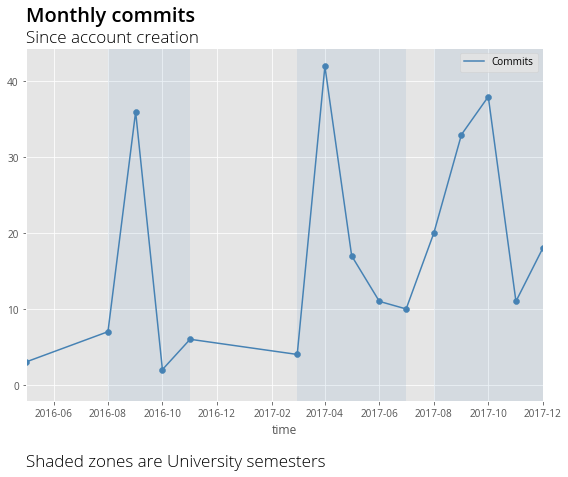

In [213]:
from datetime import date

fig, ax = plt.subplots(figsize=(8,7))
# se agrupa por mes
grouped = df.groupby(df['time'].apply(lambda x: date(year=x.year, month=x.month, day=1))).count()


grouped.plot(y='repository', ax=ax, label='Commits', color='steelblue')
ax.scatter(x=grouped.index, y=grouped['repository'], label='Commits', color='steelblue')

set_title(fig, ax, "Monthly commits", "Since account creation", [0, 0.1, 1, 0.92])
ax.text(0, -0.15, "Shaded zones are University semesters", fontsize=17, va='top', transform=ax.transAxes, fontweight='light')


import matplotlib.transforms as mtransforms

# truco para pintar por eje X
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

# 2016-2
ax.fill_between(grouped.index, 0, 40, where=((grouped.index > date(2016,7,19)) & (grouped.index < date(2016,11,20))), 
                facecolor='steelblue', alpha=0.1, transform=trans)
# 2017-1
ax.fill_between(grouped.index, 0, 40, where=((grouped.index >= date(2017,3,1)) & (grouped.index < date(2017,7,19))), 
                facecolor='steelblue', alpha=0.1, transform=trans)

# 2017-2
ax.fill_between(grouped.index, 0, 40, where=((grouped.index >= date(2017,8,1)) & (grouped.index < date(2017,12,20))), 
                facecolor='steelblue', alpha=0.1, transform=trans)


plt.savefig("img/monthly_commit.png", dpi=300)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

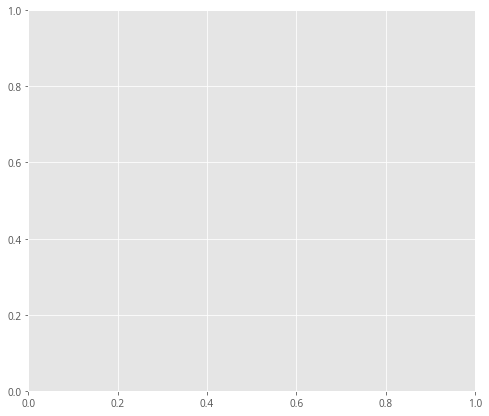

In [231]:
fig, ax = plt.subplots(figsize=(8,7))
# se agrupa por mes
temp = df.copy()
temp['weekday'] = temp['time'].apply(lambda x: x.strftime("%A"))
sns.violinplot(x='weekday', y='message', data=temp)

In [229]:
temp['weekday']

0       Saturday
1       Saturday
2       Saturday
3         Friday
4         Friday
5         Friday
6         Friday
7         Friday
8         Friday
9       Thursday
10       Tuesday
11       Tuesday
12        Friday
13        Friday
14       Tuesday
15      Saturday
16        Friday
17      Saturday
18      Saturday
19       Tuesday
20        Friday
21      Thursday
22      Thursday
23     Wednesday
24     Wednesday
25     Wednesday
26     Wednesday
27     Wednesday
28       Tuesday
29       Tuesday
         ...    
228     Thursday
229     Thursday
230    Wednesday
231    Wednesday
232    Wednesday
233    Wednesday
234    Wednesday
235    Wednesday
236    Wednesday
237      Tuesday
238      Tuesday
239      Tuesday
240       Monday
241       Monday
242       Friday
243       Friday
244       Friday
245       Friday
246       Friday
247       Friday
248     Thursday
249     Thursday
250     Thursday
251     Thursday
252     Thursday
253     Thursday
254     Thursday
255     Thursd